C:\Users\shrotti\anaconda3\lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


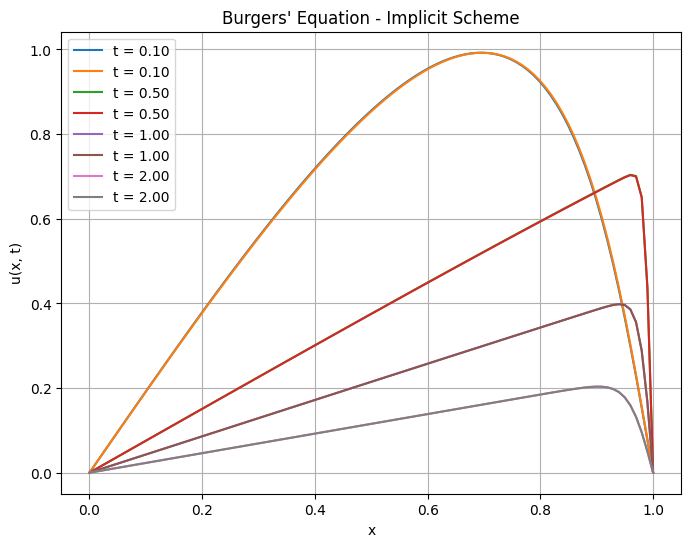

In [1]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Parameters
L = 1.0         # Length of the domain
nx = 100        # Number of grid points
nu = 0.01       # Viscosity
dt = 0.001      # Time step
t_max = 2.0     # Final time
time_steps_to_plot = [0.1, 0.5, 1.0, 2.0]   
# Discretization
dx = L / (nx - 1)
x = np.linspace(0, L, nx)

# Initial condition
u = np.sin(np.pi * x)

# Sparse matrix setup
main_diag = (1 + 2 * nu * dt / dx**2) * np.ones(nx)
off_diag = (-nu * dt / dx**2) * np.ones(nx - 1)
A = diags([off_diag, main_diag, off_diag], offsets=[-1, 0, 1], format="csr")

# Boundary conditions
A[0, :] = 0
A[0, 0] = 1
A[-1, :] = 0
A[-1, -1] = 1

# Time-stepping loop
t = 0.0
u_new = np.zeros_like(u)

# Initialize the plot
plt.figure(figsize=(8, 6))
plt.xlabel("x")
plt.ylabel("u(x, t)")
plt.title("Burgers' Equation - Implicit Scheme")
plt.grid(True)

while t < t_max:
    t += dt

    # Right-hand side
    rhs = u.copy()
    rhs[1:-1] -= (dt / (2 * dx)) * (u[2:]**2 - u[:-2]**2)  # conservative form
    
    # Apply boundary conditions
    rhs[0] = 0
    rhs[-1] = 0

    # Solve the linear system
    u_new = spsolve(A, rhs)

    # Update the solution
    u = u_new.copy()

    # Plot results at specified time steps
    if any(abs(t - target_time) < dt for target_time in time_steps_to_plot):
        plt.plot(x, u, label=f"t = {t:.2f}")

# Finalize and show the plot
plt.legend()
plt.show()


